## Impact of number of hidden neurons to model performance

This notebook investigates how the number of hidden neurons affect the model performance. We will see that increasing the number of hidden neurons increases the performance of a model using the MNIST dataset. The MNIST dataset is a common standard dataset used to evaluate machine learning models performance, which is just a task of recognizing digits from 0 to 9.

This notebook has dependencies on Keras, Scikit-Learn and MatPlotLib.


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from sklearn.preprocessing import *
from sklearn.cross_validation import *
from sklearn.metrics import *

In [31]:
TRAIN_FILE = 'data/train.csv'
TEST_FILE = 'data/test.csv'

In [32]:
train_data = np.loadtxt(TRAIN_FILE, skiprows = 1, delimiter = ',', dtype = 'float')
X = train_data[:, 1:]
# Preprocess the data to make features fall between 0 and 1. Neural networks perform a lot better in this way.
X = X/255
raw_Y = train_data[:, 0].reshape(-1, 1)

In [33]:
X_test = np.loadtxt(TEST_FILE, skiprows = 1, delimiter = ',', dtype = 'float')
# Preprocess the data to make features fall between 0 and 1. Neural networks perform a lot better in this way.
X_test = X_test/255

In [34]:
X_train, X_cv, raw_Y_train, raw_Y_cv = train_test_split(X, raw_Y, test_size = 0.20)

# Converter to transform input into one hot encoding, i.e. [3] => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0].
# Can use the np_utils from Keras instead.
Y_expander = OneHotEncoder().fit(raw_Y)
Y_train = Y_expander.transform(raw_Y_train).astype(int).toarray()
Y_cv = Y_expander.transform(raw_Y_cv).astype(int).toarray()

In [35]:
n_hiddens = [512, 256, 128, 64, 32, 16, 8, 4, 2, 1]
scores = []
for n_hidden in n_hiddens:
    # Build a simple neural network.
    model = Sequential()
    model.add(Dense(input_dim = X.shape[1], output_dim = n_hidden))
    model.add(Activation('tanh'))
    model.add(Dense(output_dim = 10))
    model.add(Activation('softmax'))
    sgd = SGD(lr=0.2, decay=1e-7, momentum=0.1, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer='sgd')

    model.fit(X_train, Y_train, nb_epoch = 10, batch_size = 10, show_accuracy = True, verbose = 1, validation_split = 0.05)
    Y_cv_pred = model.predict_classes(X_cv, batch_size = 10, verbose = 1)

    score = accuracy_score(raw_Y_cv, Y_cv_pred)
    scores.append(score)
    print('Using [%d] number of hidden neurons yields. Accuracy score: %.4f' % (n_hidden, score))
    print('')


Train on 31920 samples, validate on 1680 samples
Epoch 1/10
31920/31920 [==============================] - 3s - loss: 0.4771 - acc: 0.8713 - val_loss: 0.3271 - val_acc: 0.9054
Epoch 2/10
31920/31920 [==============================] - 3s - loss: 0.3105 - acc: 0.9121 - val_loss: 0.2945 - val_acc: 0.9119
Epoch 3/10
31920/31920 [==============================] - 3s - loss: 0.2806 - acc: 0.9207 - val_loss: 0.2707 - val_acc: 0.9185
Epoch 4/10
31920/31920 [==============================] - 3s - loss: 0.2605 - acc: 0.9250 - val_loss: 0.2533 - val_acc: 0.9232
Epoch 5/10
31920/31920 [==============================] - 3s - loss: 0.2416 - acc: 0.9320 - val_loss: 0.2368 - val_acc: 0.9262
Epoch 6/10
31920/31920 [==============================] - 3s - loss: 0.2240 - acc: 0.9367 - val_loss: 0.2233 - val_acc: 0.9321
Epoch 7/10
31920/31920 [==============================] - 3s - loss: 0.2068 - acc: 0.9407 - val_loss: 0.2104 - val_acc: 0.9357
Epoch 8/10
31920/31920 [==============================] - 3s -

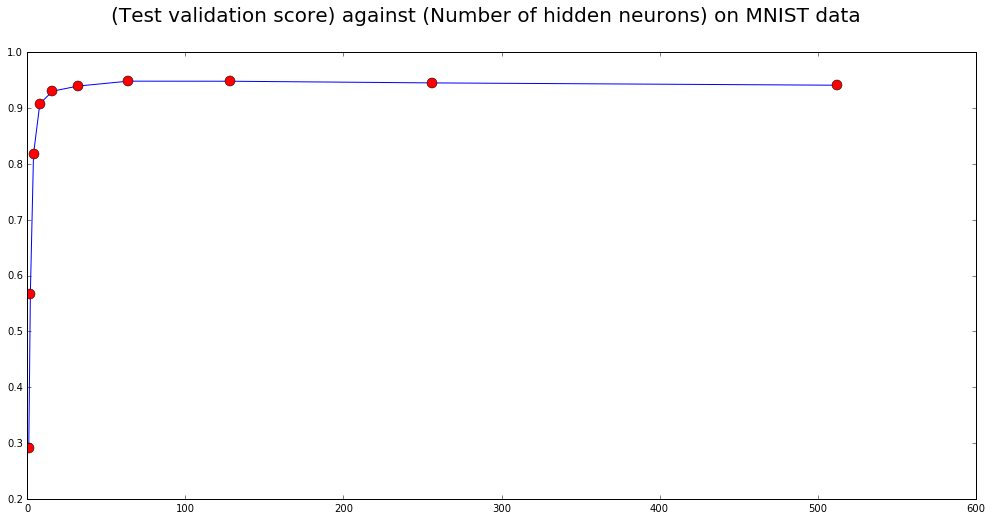

In [72]:
# Plot the results for comparison

fig = plt.figure()
fig.suptitle('(Test validation score) against (Number of hidden neurons) on MNIST data', fontsize = 20)
fig.set_figwidth(17)
fig.set_figheight(8)
ax = fig.add_subplot(111)

ax.plot(n_hiddens, scores, '-o', markersize = 10, markerfacecolor = 'r')


### What can we learn?

From here we can see the the number of hidden neurons does affect the model performance. When a neural network has too few hidden neurons (< 16), it does not have the capacity to learn enough of the underlying patterns to distinguish between 0 - 9 effectively. When the neural network has >= 16 neurons, the neural network start to do better. At increasing number of hidden neurons (>= 128), the number of hidden neurons does not help too much for this problem.

Note that I am only illustrating one single parameter here. There are a lot of other parameters like how the neural network is structured, the learning rate, and many other parameters to tune. Do play around with it to learn how neural networks behave.